In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [171]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [172]:
numerical = ['number_of_courses_viewed','annual_income','interaction_count','lead_score']
categorical = ['lead_source','industry','employment_status','location']

In [173]:
for n in numerical :
    df[n] = df[n].fillna(0)
for c in categorical:
    df[c] = df[c].fillna('NA')

In [174]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [177]:

len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [178]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [179]:
df_full_train = df_full_train.reset_index(drop=True)

In [180]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [181]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [182]:
auc_scores={}
for fea in numerical:
    auc = roc_auc_score(y_train,df_train[fea])
    final_auc = max(auc, 1 - auc)
    auc_scores[fea]=final_auc

In [183]:
auc_scores

{'number_of_courses_viewed': 0.7635680590007088,
 'annual_income': 0.5519578313253012,
 'interaction_count': 0.738270176293409,
 'lead_score': 0.6144993577250176}

In [184]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [185]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
converted = (y_pred >= 0.5)
(y_val == converted).mean()

np.float64(0.6996587030716723)

In [186]:
auc = roc_auc_score(y_val,y_pred)
auc

0.8171316268814112

In [187]:
scores = []
precision = []
recall = []
f1score= []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))
    precision.append( tp / (tp + fp))
    recall.append(tp / (tp + fn))
    f1score.append( 2 * ( (( tp / (tp + fp)) * (tp / (tp + fn)) ) / (( tp / (tp + fp)) + (tp / (tp + fn))) ) )
    

/tmp/ipykernel_2778/168857829.py:22: RuntimeWarning: invalid value encountered in scalar divide
  precision.append( tp / (tp + fp))
/tmp/ipykernel_2778/168857829.py:24: RuntimeWarning: invalid value encountered in scalar divide
  f1score.append( 2 * ( (( tp / (tp + fp)) * (tp / (tp + fn)) ) / (( tp / (tp + fp)) + (tp / (tp + fn))) ) )


In [188]:
scores_array = np.array(scores)

# Use the correct slicing syntax on the array
first_column = scores_array[:, 0]

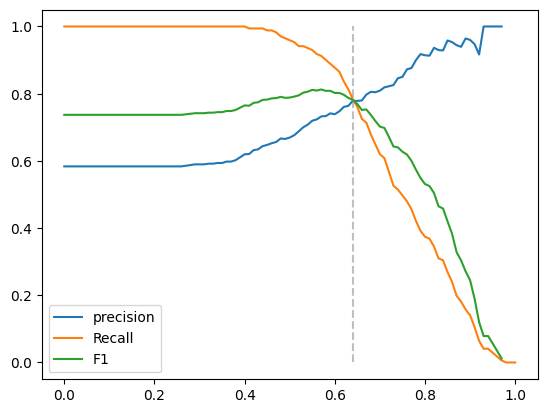

In [189]:
plt.plot(first_column, precision, label='precision')
plt.plot(first_column, recall, label='Recall')
plt.plot(first_column, f1score, label='F1')
plt.vlines(.64,0,1,color='grey', linestyle='--', alpha=0.5)
plt.legend()

In [190]:
f1score

[np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7370689655172414),
 np.float64(0.7386609071274298),
 np.float64(0.7402597402597402),
 np.float64(0.7418655097613882),
 np.float6

In [191]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [192]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [193]:
from sklearn.model_selection import KFold
!pip install tqdm
from tqdm.auto import tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [195]:
n_splits = 5

for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 33%|███▎      | 1/3 [00:00<00:00,  5.40it/s]

C=1e-06 0.561 +- 0.024


 67%|██████▋   | 2/3 [00:00<00:00,  4.04it/s]

C=0.001 0.868 +- 0.019


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=1 0.920 +- 0.011
